In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=2500, n_features=100, n_informative=50, noise=100.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_train.shape, X_test.shape)

(1750, 100) (750, 100)


In [4]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train);

In [5]:
from util import print_scores

print_scores(lin, X_test, y_test)

LinearRegression
R2 Score:                 0.9303804374831202
Explained Variance Score: 0.9306726849035205
RMSE:                     104.26580864646716


In [6]:
from algorithms import SimpleESRegressor
from objectives import RSSObjective

ses = SimpleESRegressor(objective=RSSObjective(), n_iter=250, random_state=0)
ses.fit(X_train, y_train);

100%|██████████| 250/250 [00:01<00:00, 132.62it/s]


SimpleESRegressor
R2 Score:                 0.9298932475160754
Explained Variance Score: 0.9301808046073113
RMSE:                     104.62999290193002


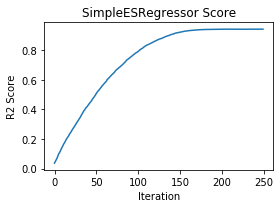

In [7]:
from util import plot_regress

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_regress(ses, X_test, y_test, ax)
fig.tight_layout()
fig.savefig("images/Toy-SimpleESRegressor-ScoreCurve.png")

In [8]:
from algorithms import GeneticESRegressor

ges = GeneticESRegressor(objective=RSSObjective(), n_iter=250, random_state=0, sigma=1.1)
ges.fit(X_train, y_train);

100%|██████████| 250/250 [00:03<00:00, 65.76it/s]


GeneticESRegressor
R2 Score:                 0.9287624979438553
Explained Variance Score: 0.9289946631249326
RMSE:                     105.47040462089883


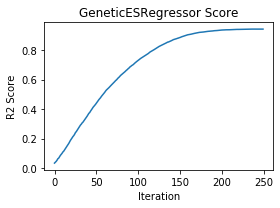

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_regress(ges, X_test, y_test, ax)
fig.tight_layout()
fig.savefig("images/Toy-GeneticESRegressor-ScoreCurve.png")

In [10]:
from algorithms import NaturalESRegressor

nes = NaturalESRegressor(objective=RSSObjective(), n_iter=250, random_state=0, sigma=0.06)
nes.fit(X_train, y_train);

100%|██████████| 250/250 [00:02<00:00, 116.39it/s]


NaturalESRegressor
R2 Score:                 0.930544213898917
Explained Variance Score: 0.9308301060655688
RMSE:                     104.14309647758188


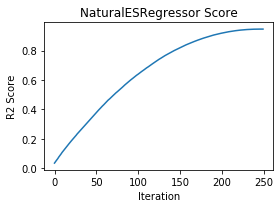

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_regress(nes, X_test, y_test, ax)
fig.tight_layout()
fig.savefig("images/Toy-NaturalESRegressor-ScoreCurve.png")

In [12]:
from algorithms import DifferentialEvolutionRegressor

dev = DifferentialEvolutionRegressor(objective=RSSObjective(), n_iter=1000, random_state=0, bounds=(-100, 100), n_pop=20, lmbda=0.7)
dev.fit(X_train, y_train);

100%|██████████| 1000/1000 [00:06<00:00, 150.56it/s]


DifferentialEvolutionRegressor
R2 Score:                 0.9293200644266073
Explained Variance Score: 0.9296966942744954
RMSE:                     105.05684237104383


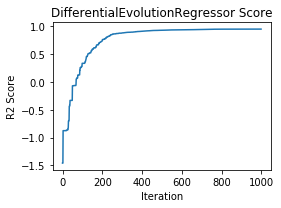

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_regress(dev, X_test, y_test, ax)
fig.tight_layout()
fig.savefig("images/Toy-DifferentialEvolutionRegressor-ScoreCurve.png")

In [14]:
from util import cross_val

ses_score = cross_val(ses, X, y)

100%|██████████| 250/250 [00:02<00:00, 102.35it/s]


In [15]:
ges_score = cross_val(ges, X, y)

100%|██████████| 250/250 [00:03<00:00, 64.29it/s]


In [16]:
nes_score = cross_val(nes, X, y)

100%|██████████| 250/250 [00:02<00:00, 100.72it/s]


In [17]:
dev_score = cross_val(dev, X, y)

100%|██████████| 1000/1000 [00:06<00:00, 146.35it/s]


In [18]:
lin_score = cross_val(lin, X, y)

In [19]:
print("SimpleESRegressor R2 Score:               %0.5f (+/- %0.5f)" % (ses_score.mean(), ses_score.std() * 2))
print("GeneticESRegressor R2 Score:              %0.5f (+/- %0.5f)" % (ges_score.mean(), ges_score.std() * 2))
print("NaturalESRegressor R2 Score:              %0.5f (+/- %0.5f)" % (nes_score.mean(), nes_score.std() * 2))
print("DifferentialEvolutionRegressor R2 Score:  %0.5f (+/- %0.5f)" % (dev_score.mean(), dev_score.std() * 2))
print("LinearRegression R2 Score:                %0.5f (+/- %0.5f)" % (lin_score.mean(), lin_score.std() * 2))

SimpleESRegressor R2 Score:               0.93438 (+/- 0.00435)
GeneticESRegressor R2 Score:              0.93192 (+/- 0.00824)
NaturalESRegressor R2 Score:              0.93710 (+/- 0.00634)
DifferentialEvolutionRegressor R2 Score:  0.93535 (+/- 0.00774)
LinearRegression R2 Score:                0.93710 (+/- 0.00627)
